<a href="https://colab.research.google.com/github/jscampbell43/G4G/blob/main/16_Intelligent_Document_Automation_Building_a_Smart_OCR_Bot_2_James_Campbell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comprehension of Intelligent Document Processing

Intelligent Document Processing (IDP) is an advanced automation technology that transforms the way businesses handle documents. By leveraging artificial intelligence (AI), IDP systems can automatically read, understand, and process vast quantities of documents, extracting crucial data and feeding it into various business workflows. This technology is a significant leap from traditional Optical Character Recognition (OCR) as it not only digitizes text but also comprehends the context and structure of the information within documents.

At its core, IDP is designed to tackle the challenge of processing unstructured and semi-structured data, which make up a large portion of business documents such as invoices, contracts, emails, and forms. By automating the extraction and interpretation of this data, IDP significantly reduces the need for manual data entry, leading to increased efficiency, higher accuracy, and substantial cost savings.

<br><br>

---
<br><br>

### The Inner Workings of Intelligent Document Processing

The power of IDP lies in its sophisticated multi-step process that intelligently handles documents from ingestion to data delivery. This process typically involves several key stages:

**1. Document Ingestion:** The first step involves importing documents from various sources and in multiple formats, including scanned paper documents, PDFs, Word files, and images.

**2. Pre-processing:** To enhance the quality of the input, documents undergo a pre-processing stage. This includes techniques like noise reduction, image enhancement, and deskewing to improve the accuracy of subsequent data extraction.

**3. Document Classification:** Using machine learning algorithms, the IDP system automatically categorizes documents based on their layout and content. This allows the system to differentiate between an invoice, a purchase order, or a legal contract, for instance.

**4. Data Extraction:** This is the core function of IDP. Advanced AI technologies, including Natural Language Processing (NLP) and computer vision, are employed to identify and extract relevant data fields. For example, from an invoice, it can pull out the invoice number, date, vendor name, and line-item details.

**5. Data Validation:** The extracted data is then validated against predefined rules and existing databases to ensure accuracy and consistency. Any exceptions or discrepancies can be flagged for human review in a "human-in-the-loop" process, which also helps to train and improve the AI model over time.

**6. Integration:** Finally, the structured and validated data is seamlessly integrated into downstream business systems such as Enterprise Resource Planning (ERP), Customer Relationship Management (CRM), or other databases, making the information readily available for further processing and analysis.


From **finance departments** automating invoice processing and expense management to **healthcare organizations** streamlining patient record management and claims processing, IDP is proving to be a game-changer. Even  **human resources** can expedite resume screening and employee onboarding. As the technology continues to evolve, its applications are expected to expand even further, solidifying its role as a cornerstone of modern digital transformation.

# Our Approach

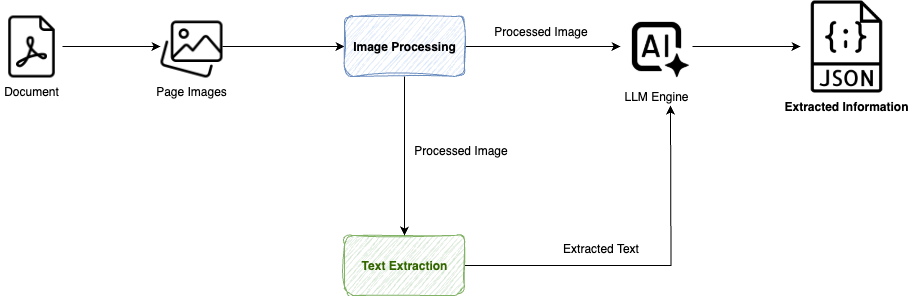

# SROIEv2: The Receipts Dataset

## Getting the data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

100%|██████████| 62.5M/62.5M [00:00<00:00, 168MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1


In [2]:
# As far as I can tell there is no entities folder in the resume data set so I commented out this line
#! cat /kaggle/input/sroie-datasetv2/SROIE2019/test/entities/X00016469670.txt

Since these are single-paged images already, we don't need to convert them

## Understanding the data


The downloaded dataset contains two major folders:
1. **train**: This folder contains the training data.
2. **test**: This folder contains the test data.

Each of these folders contains the following subfolders:
1. **img**: This folder containing the images of the receipts.
2. **box**: This folder containing the bounding box information of the text in the images and the text inside the bounding boxes. The file is a text file with the same name as the image file but with a .txt extension. The format of the file is as follows:
    ```
    x1, y1, x2, y2, x3, y3, x4, y4, text
    ```
    where (x1, y1), (x2, y2), (x3, y3), and (x4, y4) are the coordinates of the bounding box and text is the text inside the bounding box.
3. **entities**: This folder contains the ground truth information of the entities in the receipts. The file is a text file with the same name as the image file but with a .txt extension. The file contains json data with the following format:
    ```json
    {
        "company": "COMPANY_NAME",
        "date": "DATE",
        "address": "ADDRESS",
        "total": "TOTAL",
    }
    ```

## Image Preprocesing: OpenCV

In [3]:
! pip install opencv-python matplotlib numpy

Let's take one image and play with it.

In [4]:
import os
one_image_path = os.path.join(path, 'data', 'data', 'ACCOUNTANT', '10554236.pdf')
print(one_image_path)

/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/ACCOUNTANT/10554236.pdf


Here I am adding the code to change a PDF file into an image file that can be read into the various conversions in the preprocessing step.

In [5]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.11 [186 kB]
Fetched 186 kB in 0s (792 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126718 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.11_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.11) ...
Setting up poppler-utils (22.02.0-2ubuntu0.11) ...
Processing triggers for man-db (2.10.2-1) ...


In [6]:
from pdf2image import convert_from_path
import os

pdf_filename = one_image_path

# Convert PDF pages to images
images = convert_from_path(pdf_filename, dpi=300) # Adjust DPI for desired quality

# Save each page as an image file (e.g., JPG or PNG)
for i, image in enumerate(images):
    image_filename = f"page_{i+1}.jpg" # Or .png
    image.save(image_filename, "JPEG") # Or "PNG"
    print(f"Saved {image_filename}")

Saved page_1.jpg
Saved page_2.jpg
Saved page_3.jpg
Saved page_4.jpg
Saved page_5.jpg


In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_image(image, title="Image"):
    plt.figure(figsize=(7, 7))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

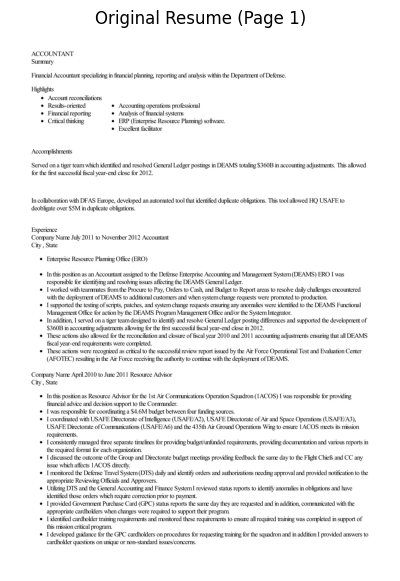

In [8]:
one_image = cv2.imread('/content/page_1.jpg')
display_image(one_image, "Original Resume (Page 1)")

### Grayscale Conversion

**Why?** Color information is usually not necessary for reading the text on a receipt. Converting the image to grayscale simplifies it from three color channels (Red, Green, Blue) to a single channel (intensity/brightness). This reduces computational complexity and is a required first step for many subsequent operations like thresholding.

In [9]:
# Convert the image to grayscale
def convert_to_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

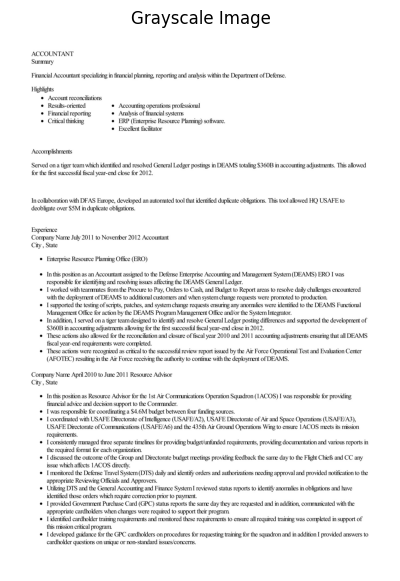

In [10]:
grayscale_image = convert_to_grayscale(one_image)
display_image(grayscale_image, "Grayscale Image")

### Noise (blur) Reduction
**Why?** Scanned images or photos often contain "noise" (random variations in brightness or color). This can look like small specks or graininess, which can confuse OCR algorithms. Applying a slight blur helps to smooth out this noise. A **Gaussian blur** is a common choice as it effectively averages out pixel values with a weighted average, preserving edges better than a simple blur.

In [11]:
def reduce_noise(gray_image):
  return cv2.GaussianBlur(gray_image, (5, 5), 0)

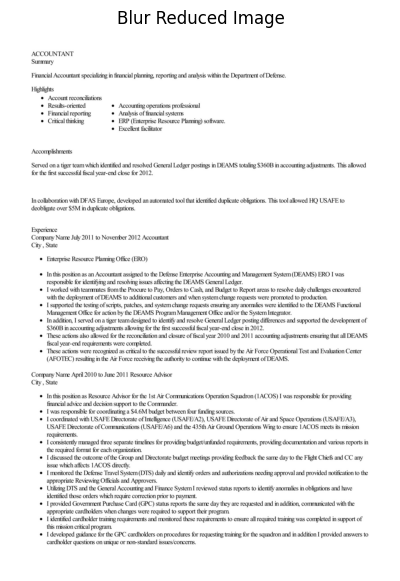

In [12]:
blur_reduced_image = reduce_noise(grayscale_image)
display_image(blur_reduced_image, "Blur Reduced Image")

### Binarization (Thresholding)

**Why?** This is one of the most critical steps. Binarization converts the grayscale image into a pure black-and-white image. The goal is to make the text **black** and the background **white**. However, receipts often have uneven lighting or shadows, so a simple (global) threshold won't work well. We use **adaptive thresholding**, which calculates a different threshold for smaller regions of the image, making it robust to lighting changes.

`cv2.adaptiveThreshold()`:

  * `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Calculates the threshold for a pixel based on a weighted sum of neighborhood values.
  * `cv2.THRESH_BINARY_INV`: Inverts the result. We want the text to be white pixels (value 255) and the background black (value 0) for the next step (skew correction), which often works by finding white pixel contours.
  * `11`: The size of the neighborhood area (block size).
  * `4`: A constant subtracted from the mean. It's a fine-tuning parameter.

In [13]:
def binarize_image(blur_reduced_image):
  return cv2.adaptiveThreshold(
    blur_reduced_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, # Invert the colors (text becomes white because of matplotlib)
    11, # Block size
    4  # Constant C
  )

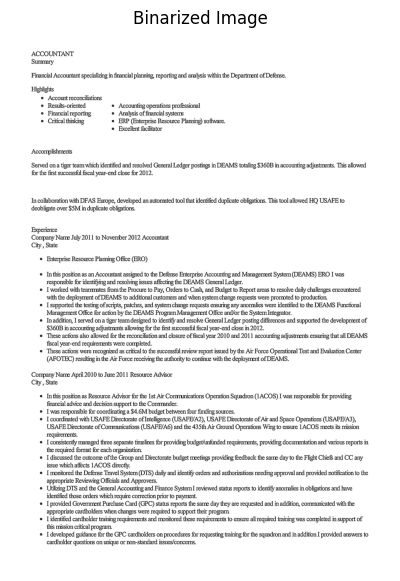

In [14]:
binarized_image = binarize_image(blur_reduced_image)
display_image(binarized_image, "Binarized Image")

### Skew Correction

**Why?** Receipts are often scanned or photographed at a slight angle. This skew can significantly reduce the accuracy of OCR. We need to detect this angle and rotate the image to make the text perfectly horizontal.

A common technique is to find the angle of the minimum-area bounding box that encloses all the text (the white pixels in our binarized image) and then rotate the original image by that angle.

In [15]:
def deskew_image(image):
    """
    Corrects the skew of an image by finding the minimum area rectangle
    of the text block and rotating accordingly.
    """
    # Find all non-zero (white) pixels
    coords = cv2.findNonZero(image)

    # Get the minimum area bounding rectangle
    # It returns (center(x,y), (width, height), angle of rotation)
    rect = cv2.minAreaRect(coords)
    angle = rect[-1] - 90

    # The `cv2.minAreaRect` angle has a specific range.
    # We need to adjust it for our rotation.
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = angle

    # Get the rotation matrix and rotate the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    print(f"Detected skew angle: {angle:.2f} degrees")

    # Now, rotate the original grayscale image by the same angle
    (h, w) = rotated.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed_gray = cv2.warpAffine(rotated, M, (w, h),
                                  flags=cv2.INTER_CUBIC,
                                  borderMode=cv2.BORDER_REPLICATE)

    return deskewed_gray

In [16]:
deskewed_image = deskew_image(binarized_image)

Detected skew angle: 0.00 degrees


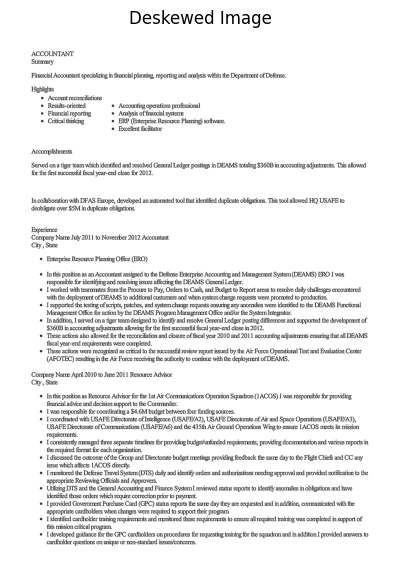

In [17]:
display_image(deskewed_image, "Deskewed Image")

Let's run the above code for all images

In [18]:
def process_one_image(image):
  image = convert_to_grayscale(image)
  print("Converted image to grayscale..")
  image = reduce_noise(image)
  print("Reduced noise in the image..")
  image = binarize_image(image)
  print("Binarized the image..")
  image = deskew_image(image)
  print("Corrected image orientation..")
  return image

In [19]:
import time
output_folder_path = "/content/processed_images"
start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")


for image_name in os.listdir(os.path.join(path, 'data', 'data', 'ACCOUNTANT'))[:20]:
  print(f"Processing image: {image_name}")
  image_path = os.path.join(path, 'data', 'data', 'ACCOUNTANT', image_name)

  #
  pdf_filename = image_path

  # Convert PDF pages to images
  images = convert_from_path(pdf_filename, dpi=300) # Adjust DPI for desired quality
  # Save each page as an image file (e.g., JPG or PNG)
  image_filename = f"page_{1}.jpg" # Or .png
  images[0].save(image_filename, "JPEG") # Or "PNG"
  print(f"Saved {image_filename}")

  image = cv2.imread('/content/page_1.jpg')
  processed_image = process_one_image(image)
  # save image
  output_path = os.path.join(output_folder_path, image_name.replace(".pdf", ".jpg"))
  cv2.imwrite(output_path, processed_image)
  print(f"Saved processed image to: {output_path}")
  print("-"*50)

print("Processing images is completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Processing image: 24817041.pdf
Saved page_1.jpg
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/24817041.jpg
--------------------------------------------------
Processing image: 16237710.pdf
Saved page_1.jpg
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/16237710.jpg
--------------------------------------------------
Processing image: 12338274.pdf
Saved page_1.jpg
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/12338274.jpg
--------------------------------------------------
Processing image: 39115899.pdf
Saved page_1.jpg
Converted image to gra

## Text Extraction: Tesseract

Tesseract OCR is a powerful and widely-used open-source optical character recognition (OCR) engine. In simple terms, it's a software that can "read" text from images and convert it into machine-readable text. This means you can take a picture of a document, a sign, or any other object containing text, and Tesseract can extract that text so you can edit, search, or analyze it.

### A Brief History and Development

Originally developed by Hewlett-Packard in the 1980s, Tesseract was later open-sourced in 2005 and has been sponsored by Google since 2006. This has led to significant improvements and made it one of the most accurate and versatile free OCR engines available. The latest versions of Tesseract utilize long short-term memory (LSTM), a type of recurrent neural network (RNN), which has greatly enhanced its ability to recognize text with high accuracy.



### Core Functionalities and Capabilities

Tesseract boasts a rich set of features that make it a flexible tool for various applications:

  * **Extensive Language Support:** Tesseract can recognize over 100 languages, making it a truly global OCR solution. It also supports multiple scripts and can even be trained to recognize new languages.
  * **Multiple Output Formats:** It can output the recognized text in various formats, including plain text, HTML, PDF, and TSV (tab-separated values). This allows for easy integration with other software and workflows.
  * **Page Segmentation Modes:** Tesseract offers different page segmentation modes, which help in correctly identifying the layout of a document, including columns, paragraphs, and blocks of text.
  * **Character Recognition and Confidence:** Not only does it recognize characters, but it can also provide a confidence score for each recognized character, word, or line. This is useful for assessing the accuracy of the OCR process.
  * **Command-Line and API Access:** Tesseract can be used as a command-line tool for quick and simple OCR tasks. For more complex integrations, it provides an API that allows developers to incorporate its OCR capabilities into their own applications. Popular wrappers like Pytesseract make it easy to use Tesseract with programming languages like Python.


### Installation
`pip install pytesseract pillow`


### How to Use Tesseract

For developers, integrating Tesseract into an application is straightforward using its API. Here is a simple example using the `pytesseract` wrapper in Python:

```python

from PIL import Image
import pytesseract


text = pytesseract.image_to_string(Image.open(filename))

print(text)
```



### Common Use Cases and Applications

The ability to extract text from images opens up a vast range of applications across various industries:

  * **Document Digitization:** Converting scanned documents, books, and historical archives into searchable digital text.
  * **Data Entry Automation:** Automating the process of entering data from invoices, receipts, and forms.
  * **Accessibility:** Assisting visually impaired individuals by converting printed text into speech.
  * **License Plate Recognition:** In law enforcement and traffic management systems.
  * **Social Media Monitoring:** Analyzing text within images shared on social media platforms.
  * **Translation:** Extracting text from an image and then using a translation service to translate it.

While Tesseract is a powerful tool, the accuracy of its output heavily depends on the quality of the input image. For best results, images should be clear, well-lit, and have a high resolution. Pre-processing steps like resizing, noise reduction, and converting to grayscale can significantly improve OCR accuracy.

In [20]:
! pip install pytesseract pillow

In [22]:
from PIL import Image
import pytesseract

# This line worked when I first tried it and on a second run it didnt work. Maybe it gave a new number designation and now if cant find the specific file.
# This example code does not work here but it does work in the for loop below where it is actually critical for the rest of the assignment so I left this line commented
#pytesseract.image_to_string(Image.open('/content/processed_images/12780508.jpg'))

In [23]:
from PIL import Image
import pytesseract
import time

input_folder_path = "/content/processed_images"
output_folder_path = "/content/tesseract_output"
start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(input_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(input_folder_path, image_name)
  print("Extracting text from image..")
  text = pytesseract.image_to_string(Image.open(image_path))
  output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".txt"))
  with open(output_path, "w") as f:
    f.write(text)

  print(f"Saved extracted text to {output_path}")
  print("-"*50)

print("Text Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 20
Processing image 1/20: 75286906.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/75286906.txt
--------------------------------------------------
Processing image 2/20: 23246831.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/23246831.txt
--------------------------------------------------
Processing image 3/20: 16237710.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/16237710.txt
--------------------------------------------------
Processing image 4/20: 10674770.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/10674770.txt
--------------------------------------------------
Processing image 5/20: 39115899.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/39115899.txt
--------------------------------------------------
Processing image 6/20: 24817041.jpg
Extracting text from image..
Saved extract

## Information Extraction

In [24]:
prompt = """
Extract the information from the given image.
Information to be extracted: name, accomplishments, years of experience, education.
The image has been converted to grayscale, noise reduced, binarized, and deskewed using opencv.
Always give your response in the following format:
{
    "name": "NAME",
    "accomplishments": "ACCOMPLISHMENTS",
    "years of experience": "YEARS_EXPERIENCE",
    "education": "EDUCATION",
}
Also, the text has been extracted from the image using tesseract.
Use the extracted text as support for extracting information.
If you believe the text extraction is incorrect somewhere, you may correct it yourself and provide corrected information.
Respond with the extracted information only in the specified format.
Here is the text:


"""

Can we improve the prompt using the [Unified Framework For An Effective Prompt](https://www.geeksforgeeks.org/data-science/a-unified-framework-for-an-effective-prompt/)?

In [25]:
from google import genai
from google.colab import userdata # colab only code
from PIL import Image
import json
import time

In [26]:
genai_client = genai.Client(api_key=userdata.get('GOOGLE_API_KEY'))

In [27]:
image_folder_path = "/content/processed_images"
text_folder_path = "/content/tesseract_output"
output_folder_path = "/content/json_output"

start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(image_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(input_folder_path, image_name)
  print(f"Loading image: {image_path}")
  with open(image_path, "rb") as f:
    image = Image.open(image_path)
    # print(image)


  text_path = os.path.join(text_folder_path, image_name.replace(".jpg", ".txt"))
  print(f"Loading extracted text: {text_path}")
  with open(text_path, "r") as f:
    text = f.read()

  print("Extracting information from image and text..")

  prompt = prompt + text



  contents = [
        image,
        {
            "text": prompt
        }
    ]
  response = genai_client.models.generate_content(model='gemini-2.5-flash', contents=contents)

  # Access the usage_metadata attribute
  usage_metadata = response.usage_metadata

  # Print the different token counts
  print(f"Input Token Count: {usage_metadata.prompt_token_count}")
  print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
  print(f"Output Token Count: {usage_metadata.candidates_token_count}")
  print(f"Total Token Count: {usage_metadata.total_token_count}")

  extracted_information = json.loads(response.text.replace('```json', '').replace('```', ''))
  output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".json"))
  with open(output_path, "w") as f:
    json.dump(extracted_information, f, indent=4)

  print(f"Saved extracted information to {output_path}")
  print("-"*50)
  time.sleep(60)

print("Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 20
Processing image 1/20: 75286906.jpg
Loading image: /content/processed_images/75286906.jpg
Loading extracted text: /content/tesseract_output/75286906.txt
Extracting information from image and text..
Input Token Count: 1184
Thoughts Token Count: 3137
Output Token Count: 934
Total Token Count: 5255
Saved extracted information to /content/json_output/75286906.json
--------------------------------------------------
Processing image 2/20: 23246831.jpg
Loading image: /content/processed_images/23246831.jpg
Loading extracted text: /content/tesseract_output/23246831.txt
Extracting information from image and text..
Input Token Count: 1614
Thoughts Token Count: 1694
Output Token Count: 294
Total Token Count: 3602
Saved extracted information to /content/json_output/23246831.json
--------------------------------------------------
Processing image 3/20: 16237710.jpg
Loading image: /content/processed_images/16237710.jpg
Loading extracted text: /content/tesseract_output/16237

# Can you play with a Resume Dataset?

https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset

#Submission

I have modified this code to use 20 images from the Resume Data set. I selected and processed only page 1 from each of the 20 PDFs so the total number of processed images was still 20.

This is truly amazing. The raw extraction power is already remarkable but the accuracy is also very impressive. I remember the first image detecting translation apps that never really worked. I would be interested to see how these perform on characters from other languages that are more symbol or pictoral based. In the future when I return to this project I will try building a translator.

The applications are limitless though, translate real world documents, pull text from images for products for scanning/tracking systems, pulling text from live video feeds like license plate readers. Cars with HUDs could have text enhancing features to make streetsigns easier to see and read. A truly amazing tool, and it's free!

**JSON Output Examination**

Here as a further examination of what the JSON file looks like I opened it up and read out the data that had been captured for Name, Accomplishments, Experience, and Education.

For some reason it did not pick up the applicants Name, however it was very good at finding everything else. I was particularly impressed with how it found all the applicants accomplishments as that is a rather vague idea. It may have also return things like tasks or responsibilies in this list.

In [28]:
try:
    with open('/content/json_output/10674770.json', 'r') as file:
        data = json.load(file)

    print("Loaded JSON data:")
    print(data)

except FileNotFoundError:
    print("Error: The file 'example.json' was not found.")
except json.JSONDecodeError:
    print("Error: Failed to decode JSON from the file. Check for malformed JSON.")



Loaded JSON data:
{'name': 'N/A', 'accomplishments': "Highly analytical and detail-oriented professional; possessing extensive financial statement background in quality assurance, compliance, auditing, customer service and regulatory requirements. Thorough knowledge of financial reporting, cash and accrual basis accounting, fund basis reporting, GAAP and other accounting standards. Adapt quickly when new software and systems are installed. Proficient with: QuickBooks, MAS, ADP, Condo Manager, Adobe, and all Microsoft applications software. Excel in problem solving and strategic planning skills. DBA Quick Books MAS, Sage Software, Microsoft Excel, ADP Drive, Microsoft Access, Condo Manager, Microsoft Word. Performed all month end functions to produce financial statements, including reconciliation of operating and payroll bank accounts, recorded sales, payroll journals, accrued payroll, sales tax submission to NC department of revenue, inventory adjustments, and balance sheet month end e

{
'**name**': 'N/A',

'**accomplishments**': "Highly analytical and detail-oriented professional; possessing extensive financial statement background in quality assurance, compliance, auditing, customer service and regulatory requirements. Thorough knowledge of financial reporting, cash and accrual basis accounting, fund basis reporting, GAAP and other accounting standards. Adapt quickly when new software and systems are installed. Proficient with: QuickBooks, MAS, ADP, Condo Manager, Adobe, and all Microsoft applications software. Excel in problem solving and strategic planning skills. DBA Quick Books MAS, Sage Software, Microsoft Excel, ADP Drive, Microsoft Access, Condo Manager, Microsoft Word. Performed all month end functions to produce financial statements, including reconciliation of operating and payroll bank accounts, recorded sales, payroll journals, accrued payroll, sales tax submission to NC department of revenue, inventory adjustments, and balance sheet month end entries. Entered all payables and receivables for 7 franchise locations. Worked with vendors to resolve situations. Reviewed and maintained franchise documents. Worked directly with controller on year-end review. Assembled requested financial and legal documentation. Maintained weekly spreadsheet on collected franchise royalties and advertising fees for year-end audit. Managed a company owning and renting out 12 commercial properties. Negotiated rent rates, wrote leases, collected rent, managed cash flow, payables, and resolved tenant complaints. Managed a small farming entity, maintained cash flow, managed payables, and set up credit accounts with vendors. Entered all payroll journals and maintained cash flow for farming entity employees. Filed North Carolina Annual Report for all companies managed by Cary Keisler Inc. and verified current filings. Collected daily deposits and balances for SOs. Interacted directly with customers on outstanding deposits and balances due. Responsible for all PO and non-PO payable entry/coding. Resolved discrepancies with vendors on payables. Pulled weekly-unpaid bills reports for cash flow projections. Completed weekly check runs. Reconciled monthly purchasing American Express credit card (ranging from $60,000.00 - $100,000.00+). Helped facilitate purchasing manager role during turnover (Sept 2013 - Dec 2013). Responsible for ordering materials/supplies for factory production floor. Worked with VP of Finance and production floor members for data collection to develop unit valuation and for future bills of materials and job costing. Led reconciliation of Balance Sheet to ensure no discrepancy with General Ledger. Researched and resolved transactions deviating from ordinary operations. Ran Project Cost Reconciliation at month end to ensure all billable expenses are posted to a project and General Ledger account, providing billing information and correct bottom line. Designed Excel Spreadsheet for prepaid employee benefits for EOM reconciliation. Reconciled American Express accounts for SDI and Battleware. Responsible for all entry and custodial bookkeeping of SDI's fixed assets for depreciation purposes (10 Accounts). Daily reconciliation of SDI's Operating, Interest Sweep, and Line of Credit accounts for accurate cash projections. Responsible for coding and entry of all Payables items for SDI and Battleware. Prepared monthly Sales and Use Tax.", 'years of

**experience**': '2 years and 9 months',

'**education**': 'Bachelor of Science in Accounting, May 2010, University of North Carolina; Bachelor of Science in Business Administration Finance, May 2010, University of North Carolina'}
